In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno
#configure

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

#importing all the required libraries

#importing the dataset

In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\DataScience\DataSets\Hackathon 2\Data.csv')


In [4]:
df.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


-> Customerid can be taken as index column.
-> jobedu column can be split into 2 at the ',' to 'Job' and 'Education'. 
-> In the month column , the year is same for all. Only the Month can be extracted and year can be removed using regex.
-> in Duration column , the 'sec' can be removed and only the numerical values can be taken. However , some of the columns contain minutes. They can be multiplied by 60 to convert them to seconds and only numerical values can be extracted.
#IN the below cells the operations are performed to remove above abnormalities.

In [5]:
df=df.set_index('customerid')

Diving the jobedu row using regex.

In [6]:
#df[['First','Last']] = df.Name.apply(lambda x: pd.Series(str(x).split("_"))) 

df[['job','edu']] = df['jobedu'].apply(lambda x: pd.Series(str(x).split(","))) 
df.head()

# divind the jobedu row

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [7]:
df=df.drop(columns=['jobedu'])

In [8]:
df.sample(5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,
19394,49.0,20000,141,married,yes,no,no,no,cellular,6,"aug, 2017",4.58333333333333 min,1,-1,0,unknown,no,blue-collar,secondary
14259,35.0,120000,1859,married,yes,no,yes,no,cellular,14,"jul, 2017",3.78333333333333 min,2,-1,0,unknown,no,entrepreneur,tertiary
12922,58.0,120000,124,married,yes,no,yes,no,cellular,7,"jul, 2017",293 sec,7,-1,0,unknown,no,entrepreneur,primary
31181,25.0,60000,1231,single,yes,no,yes,no,cellular,27,"feb, 2017",6.86666666666667 min,5,-1,0,unknown,yes,technician,secondary
40822,20.0,4000,53,single,yes,no,no,no,cellular,11,"aug, 2017",3.38333333333333 min,1,-1,0,unknown,no,student,secondary


The new rows, job and edu are appended in the last column.

In [ ]:
#removing all the numerical values in the month column so that only alphabets are left.',' is also removed. Since the year is same i.e., 2017 this operation is performed.

In [9]:
df['month']=df['month'].replace('(\d)', '', regex=True).replace(',', '', regex=True)

In [10]:
df.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,261 sec,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,151 sec,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,76 sec,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,92 sec,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,no,no,no,no,unknown,5,may,198 sec,1,-1,0,unknown,no,unknown,unknown


# Function to convert duration column into 'int' datatype and change min to sec by multiplying by 60 if 'min' exists in column

In [13]:

def dur(st):
    import re
    if 'sec' in st:
        st=re.sub("[^0-9.]", "", st)
        return (float(st))
    elif 'min' in st:
        st=re.sub("[^0-9.]", "",st)
        st=float(st)
        st=round(st,2)
        st=st*60
        return (st)

In [14]:
st='261.555 sec'
dur(st)

261.555

In [15]:
df['duration'] = df['duration'].apply( dur)
df.head()
#apply function is use function in pandas.

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,no,no,no,no,unknown,5,may,198.0,1,-1,0,unknown,no,unknown,unknown


In [16]:
df.head(5)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000,2143,married,yes,no,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no,management,tertiary
2,44.0,60000,29,single,yes,no,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no,technician,secondary
3,33.0,120000,2,married,yes,no,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000,1506,married,no,no,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0,1,single,no,no,no,no,unknown,5,may,198.0,1,-1,0,unknown,no,unknown,unknown


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1 to 45211
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45191 non-null  float64
 1   salary    45211 non-null  object 
 2   balance   45211 non-null  int64  
 3   marital   45211 non-null  object 
 4   targeted  45211 non-null  object 
 5   default   45211 non-null  object 
 6   housing   45211 non-null  object 
 7   loan      45211 non-null  object 
 8   contact   45211 non-null  object 
 9   day       45211 non-null  int64  
 10  month     45161 non-null  object 
 11  duration  45211 non-null  float64
 12  campaign  45211 non-null  int64  
 13  pdays     45211 non-null  int64  
 14  previous  45211 non-null  int64  
 15  poutcome  45211 non-null  object 
 16  response  45181 non-null  object 
 17  job       45211 non-null  object 
 18  edu       45211 non-null  object 
dtypes: float64(2), int64(5), object(12)
memory usage: 6.9+ MB


In [ ]:
# All the required columns are converted to numerical for further analysis and salary column must be conveted .

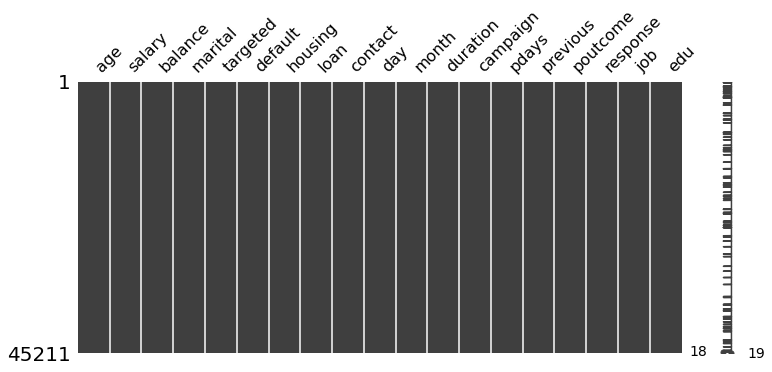

In [21]:
msno.matrix(df,figsize=(12,5))
#null values seem to be negligible.

In [18]:
df.isna().sum()

age         20
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month       50
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response    30
job          0
edu          0
dtype: int64

Since the missing values rows are less compared to total of 45211, the missing rows can be removed.

In [69]:
df1=df.dropna()
#since null values consitute only small amount , they dropped.

In [70]:
df1.isna().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

In [71]:
def sal(st):
    st=re.sub("[^0-9.]","", st)
    return ((int(st)))

In [72]:
df1['salary']=df1['salary'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

In [73]:
df1.astype({'salary': 'float'}).dtypes
#here salary column is converted to floar dtype after using regex to extract only numerical values from salary column.

age         float64
salary      float64
balance       int64
marital      object
targeted     object
default      object
housing      object
loan         object
contact      object
day           int64
month        object
duration    float64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
job          object
edu          object
dtype: object

In [74]:
df1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,
1,58.0,100000.0,2143,married,yes,no,yes,no,unknown,5,may,261.0,1,-1,0,unknown,no,management,tertiary
2,44.0,60000.0,29,single,yes,no,yes,no,unknown,5,may,151.0,1,-1,0,unknown,no,technician,secondary
3,33.0,120000.0,2,married,yes,no,yes,yes,unknown,5,may,76.0,1,-1,0,unknown,no,entrepreneur,secondary
4,47.0,20000.0,1506,married,no,no,yes,no,unknown,5,may,92.0,1,-1,0,unknown,no,blue-collar,unknown
5,33.0,0.0,1,single,no,no,no,no,unknown,5,may,198.0,1,-1,0,unknown,no,unknown,unknown


In [75]:
df1.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45111.000000,45049.000000,45111.000000,45111.000000,45111.000000,45111.000000,45111.000000,45111.000000
mean,40.938352,57084.241604,1362.539647,15.808118,258.162745,2.762541,40.193323,0.580391
std,10.619601,32042.589845,3046.016714,8.323389,257.498643,3.093698,100.094574,2.304710
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.200000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.200000,63.000000,871.000000,275.000000


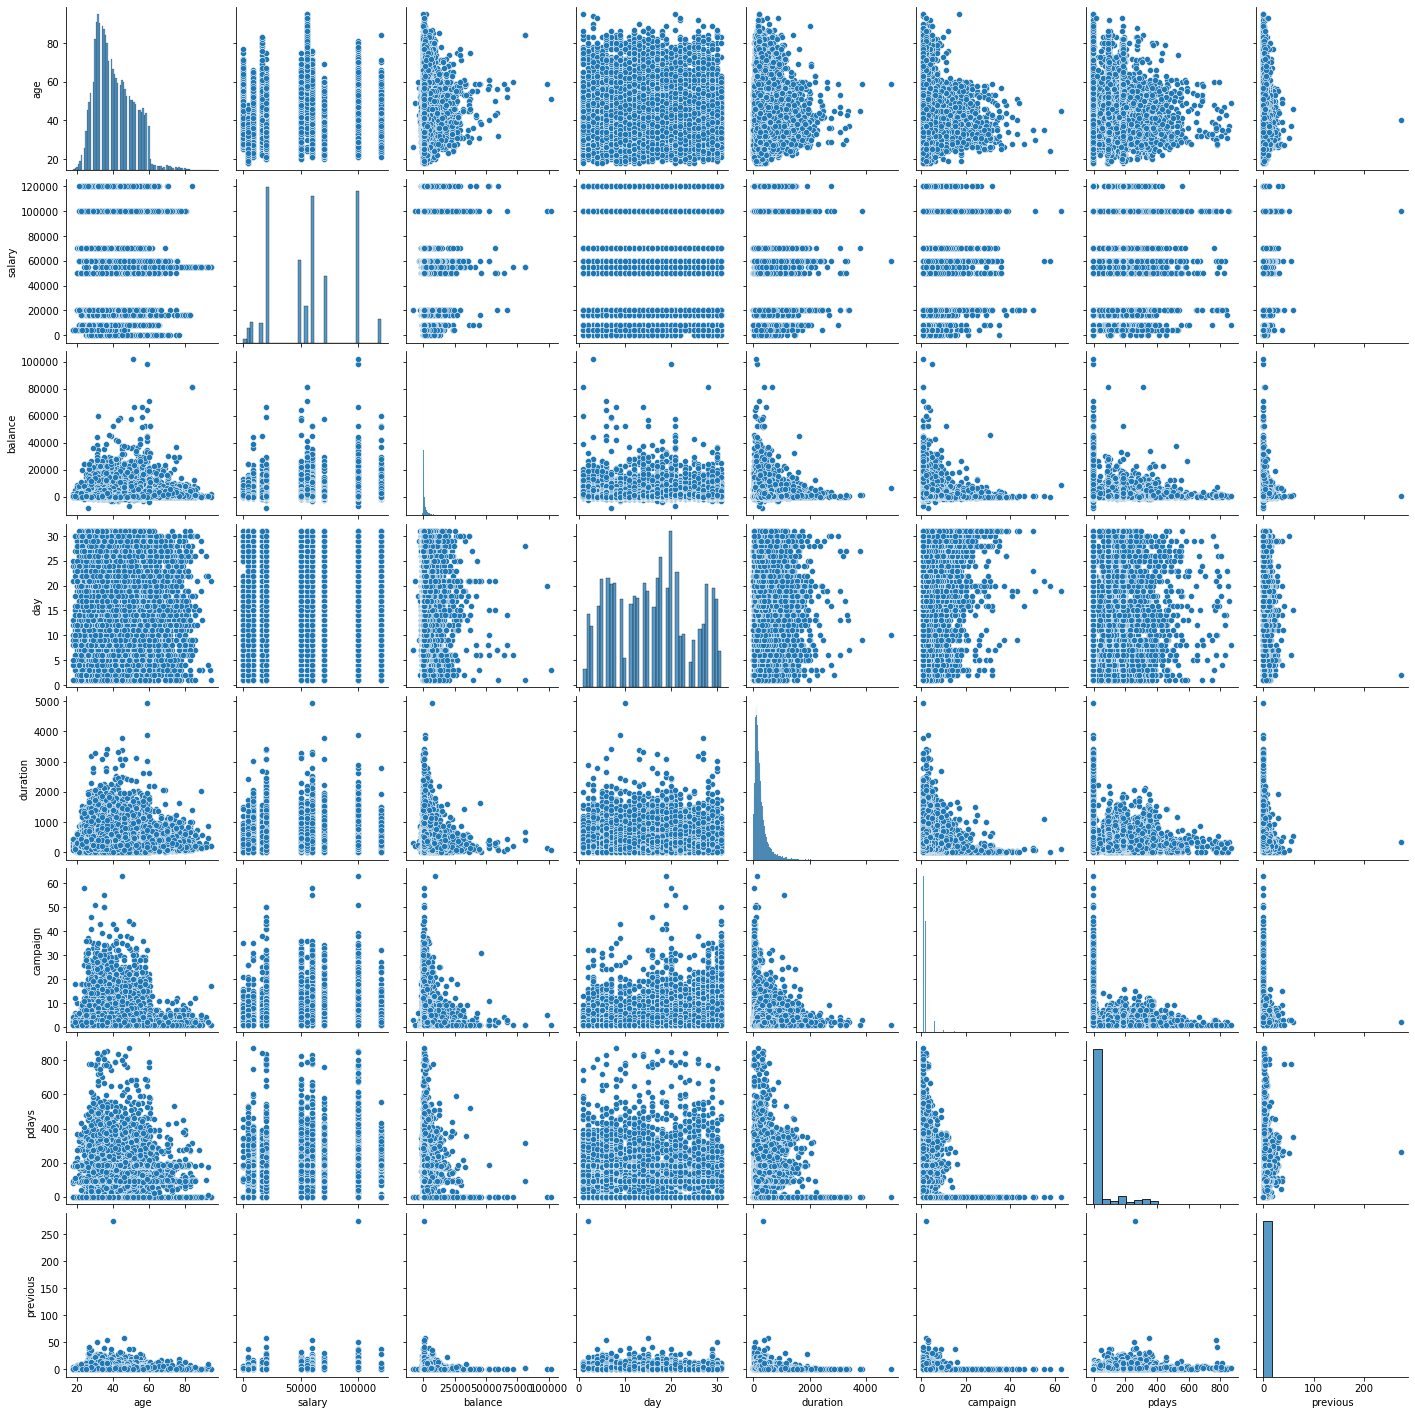

In [76]:
sns.pairplot(df1)

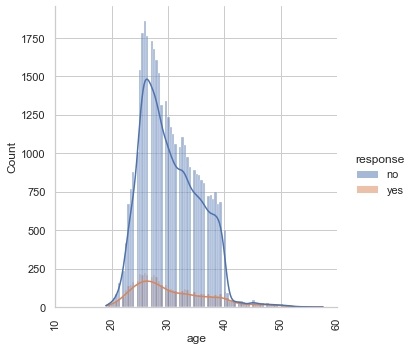

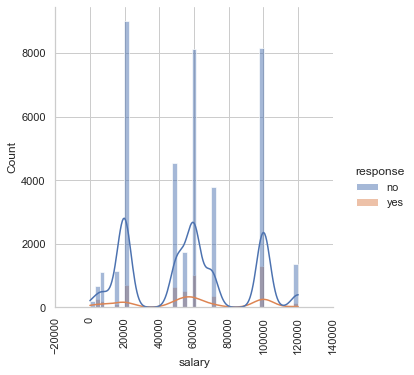

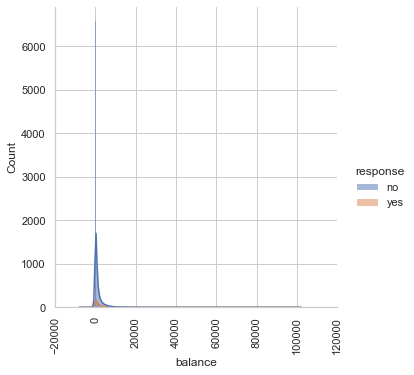

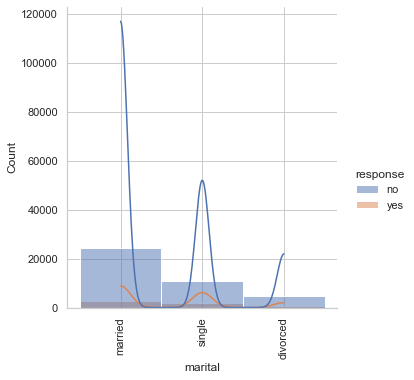

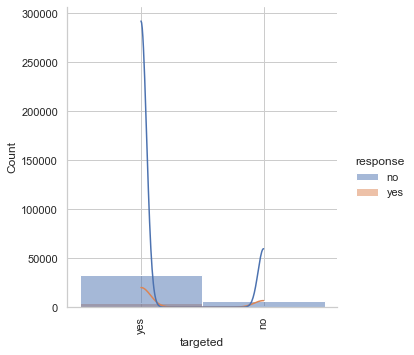

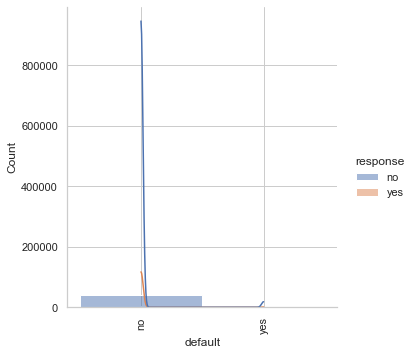

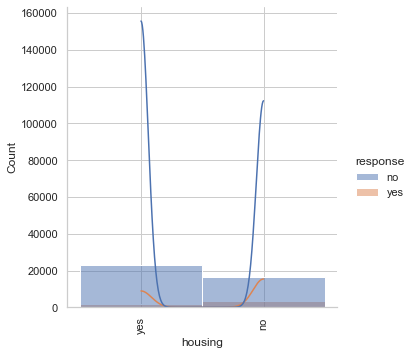

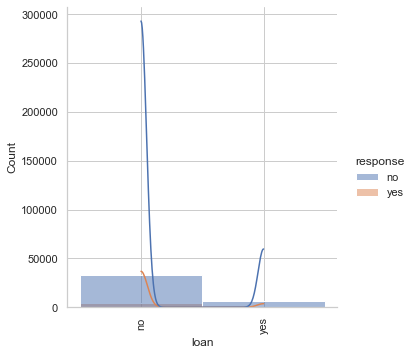

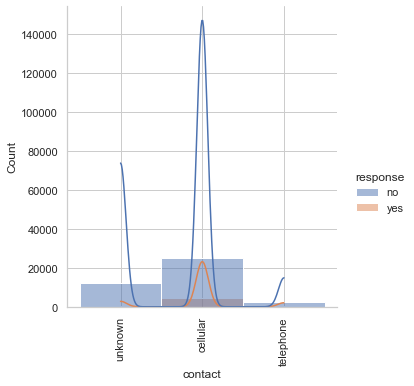

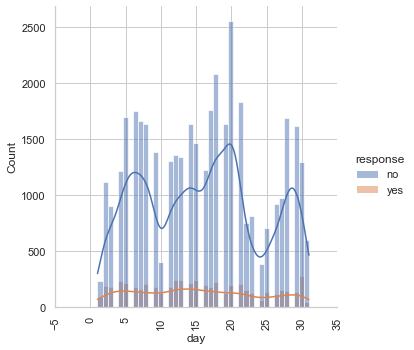

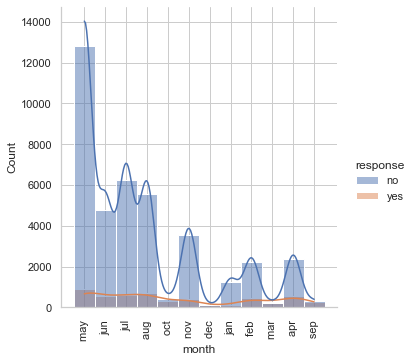

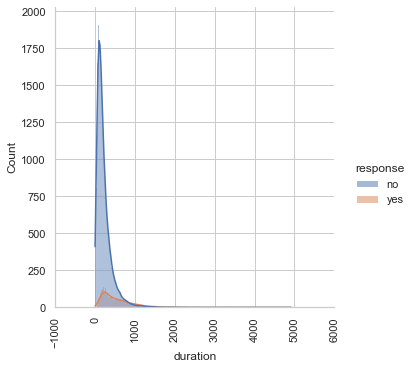

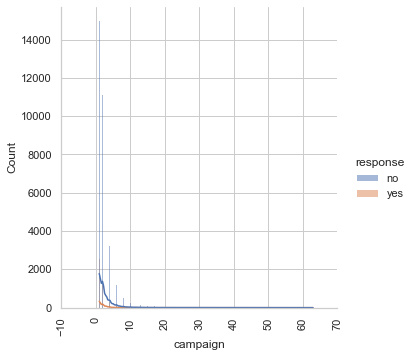

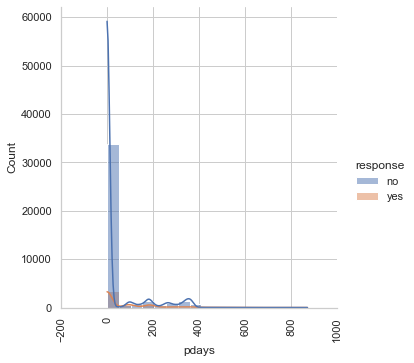

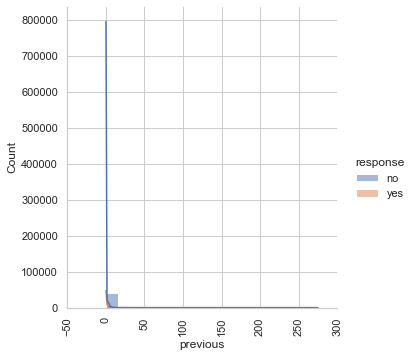

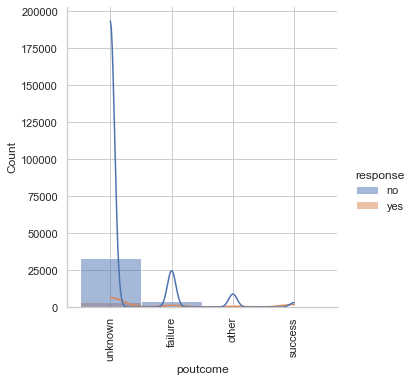

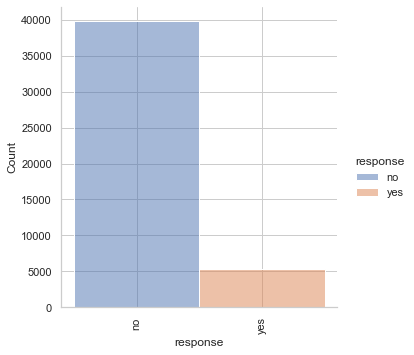

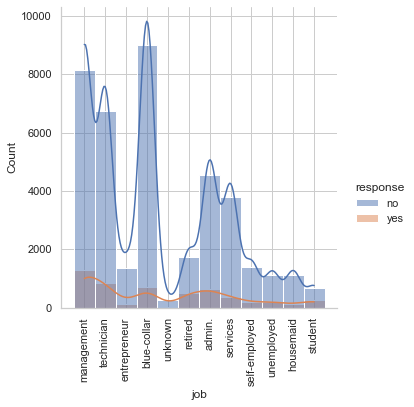

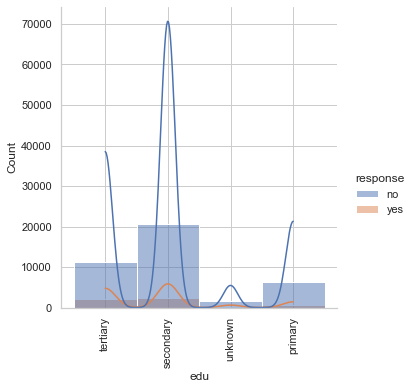

In [222]:
for i in df1.columns: 
    sns.set_theme(style="whitegrid")
    ax=sns.displot(df1, x=i, kde=True, hue="response")
    ax.set_xticklabels(rotation=90)
    plt.show()

Inferences :
1) Here the majority of the age group is in between 20-40 , THey are interested in investing in FDs.
2) Here people who are interested is also in the majority group.
3) Comparing marital status , the response of no's is less for divorced people.It is gradually changing wrt to the number or frequency.
4) People with non default of loan has high rate compared to  defaulters.
5) People who took no loan showed interest in FD's
6) in the mid of the month , the response ratio is higher compared to the end of the month.
7) In the mid of the year months, mar, apr, feb , aug , june, july , the response ratio is high.
8) People in higher positions in the company showed interest for Term deposits.
9) people with secondary and tertiary education showed more interest.

In [208]:
df1.describe().columns

Index(['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')

In [34]:
num_cols=['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous']
#columns with numerical quantities or continuous variable.

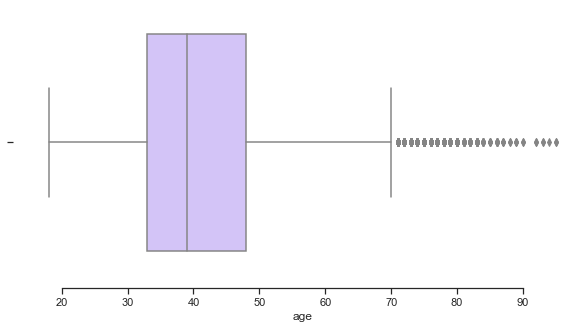

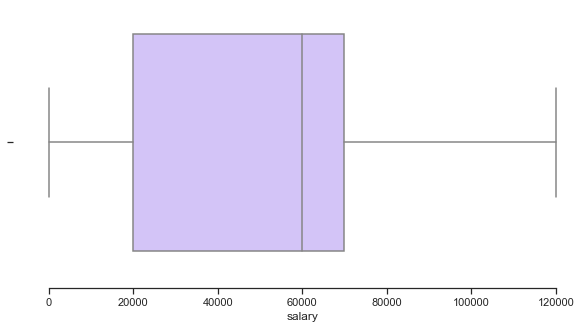

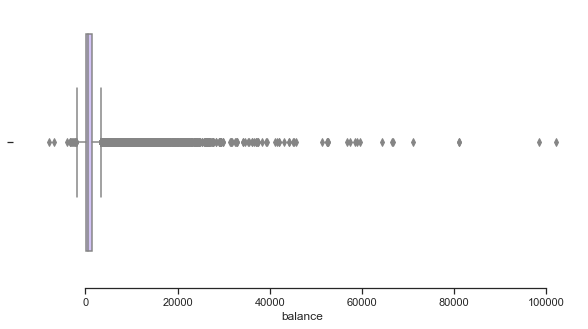

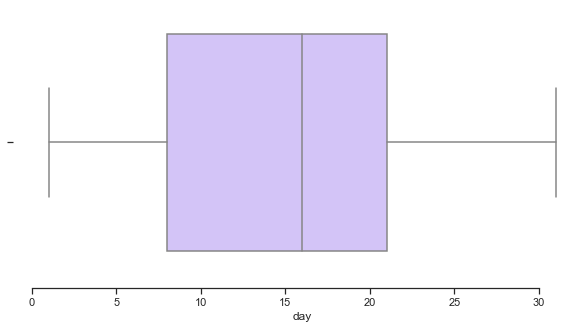

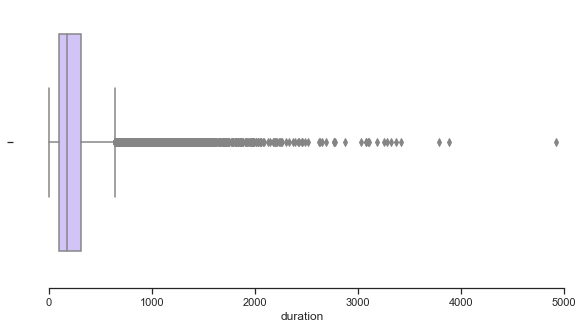

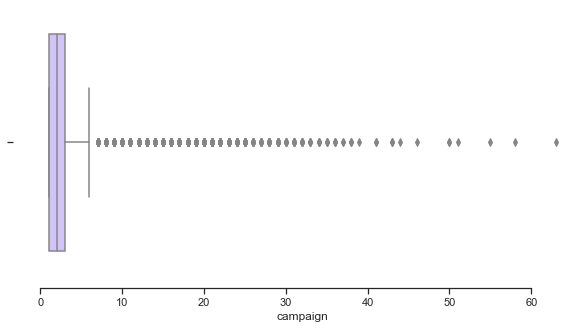

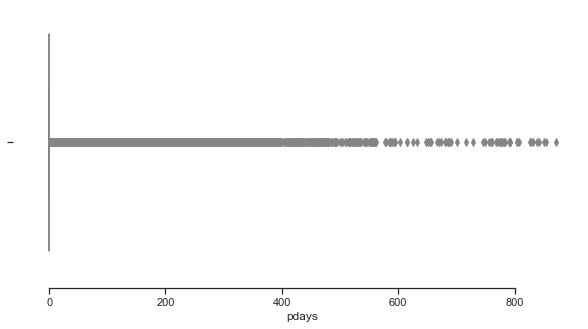

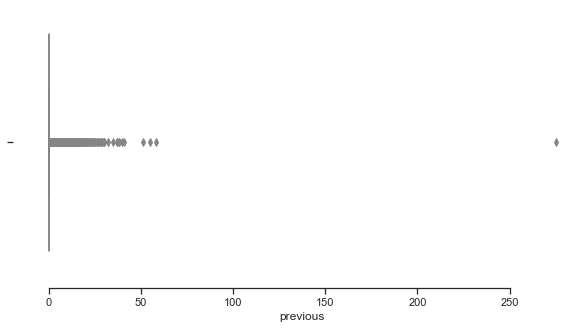

In [209]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")

for i in df1.describe().columns:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.boxplot(x=i,palette=["m", "g"],data=df1)
    sns.despine(offset=10, trim=True)
    plt.show()

In [ ]:
# older people also are interested in FD's . so outliers in age group doesn't play a insignificant role.
# Balance can be negative as well, If they owe the bank. It can also be ignored.

Histogram of all the continuous variables.

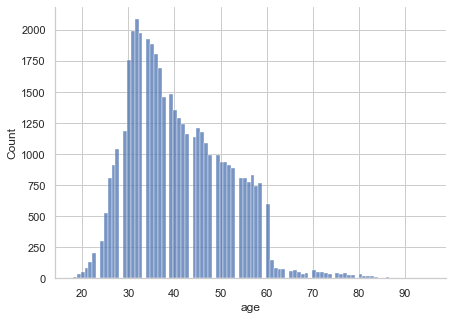

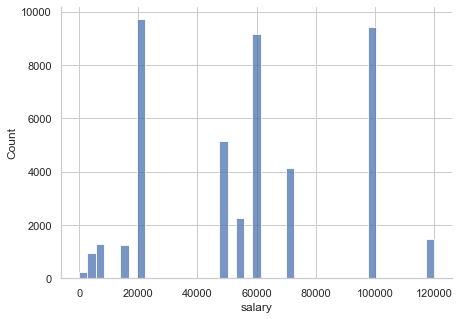

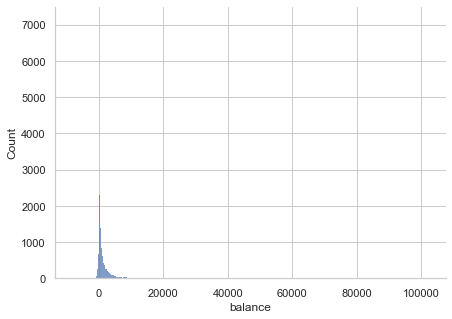

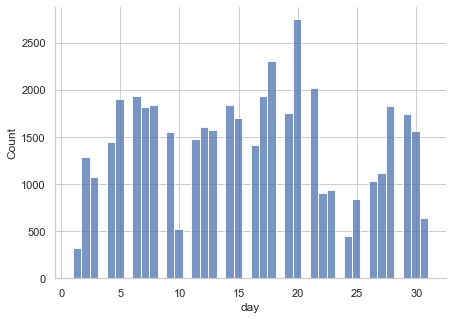

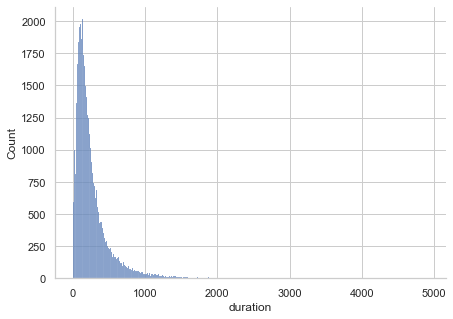

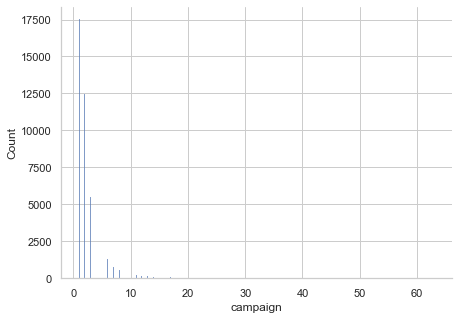

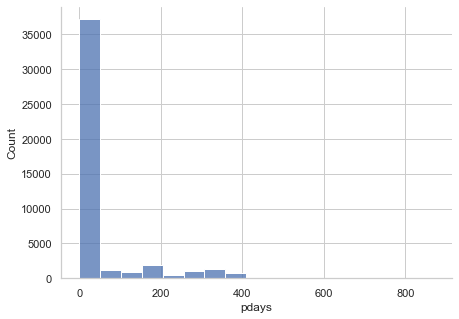

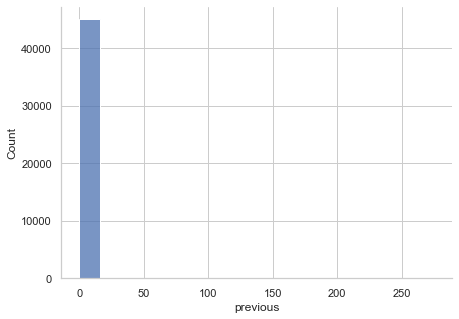

In [245]:
for i in num_cols:
    f, ax = plt.subplots(figsize=(7, 5))
    sns.despine(f)

    sns.histplot(df1,x=i,       
    )

Comparison of all continuous variables and responses

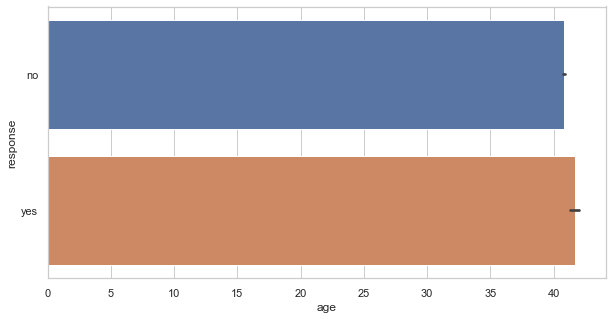

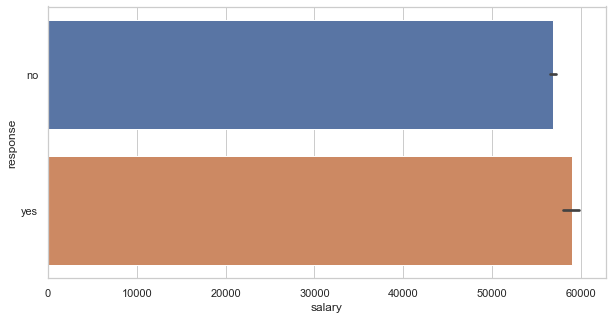

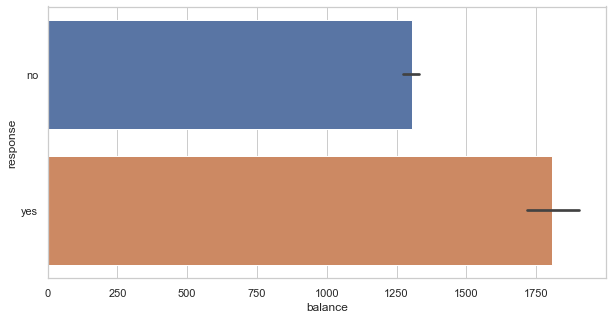

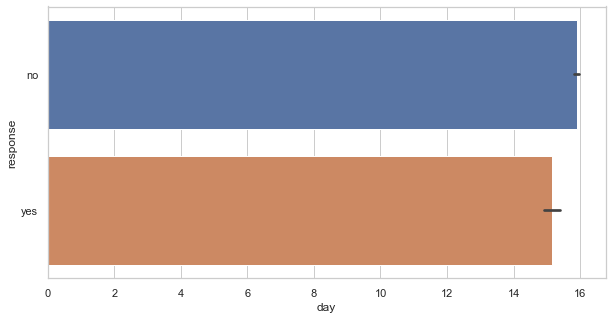

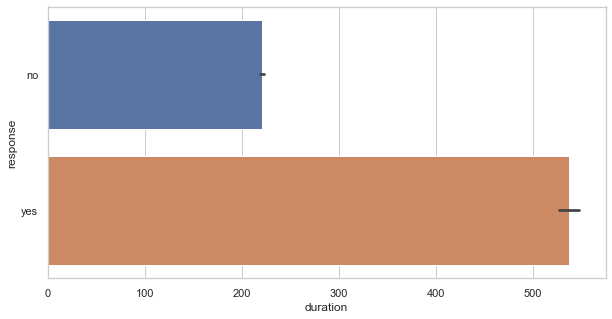

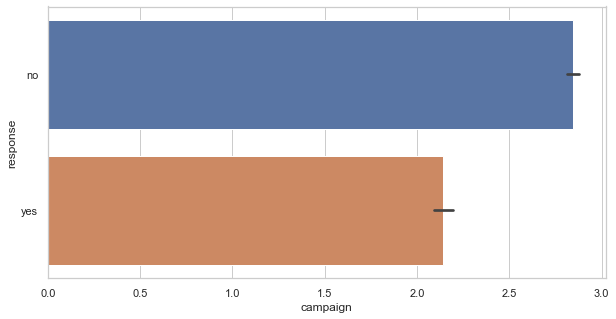

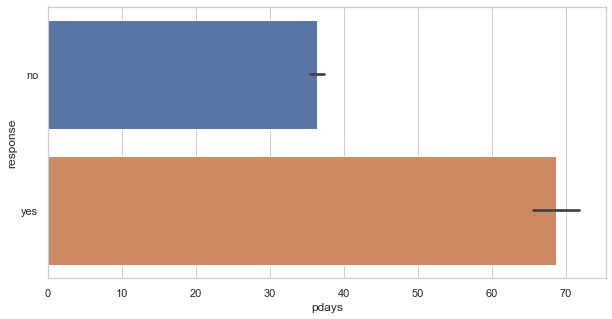

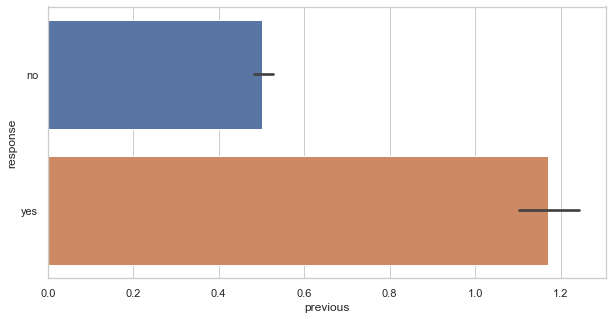

In [241]:
for i in num_cols:
    fig, ax = plt.subplots(figsize=(10, 5))
    ax = sns.barplot(x=np.round(df1[i],1), y=df1.response, data=df1)
    plt.show()

-> For positive response the duration of calls or follow up are high.
-> More the number of follow - ups more the number of customers , it can be understood from Previous , pdays columns.
-> more the balance in the account , higher the chance for a customer to have a postive response.

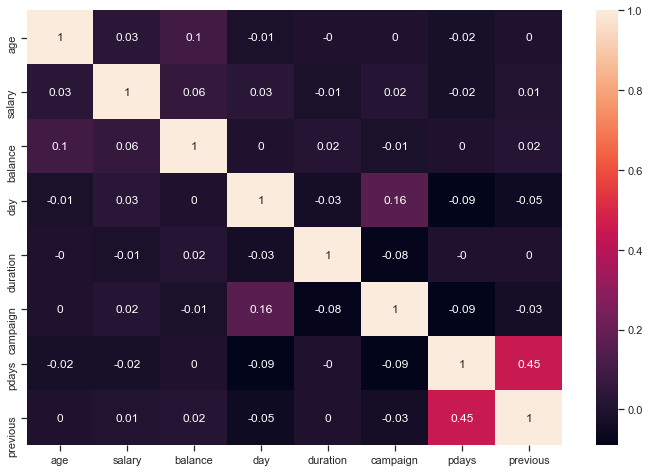

In [218]:
fig, ax = plt.subplots(figsize=(12,8))   
heat=df1.corr()
sns.heatmap(np.round(heat,2),annot=True)

->there seems to be high relation ship between 'pdays and previous', 'day and campaign'.
-> since the output is a label , we don't get much information from the heatmap.

In [95]:
df1.isna().sum()

age         0
salary      0
balance     0
marital     0
targeted    0
default     0
housing     0
loan        0
contact     0
day         0
month       0
duration    0
campaign    0
pdays       0
previous    0
poutcome    0
response    0
job         0
edu         0
dtype: int64

In [96]:
#count of outliers in different columns
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
((df1 < (Q1 - 1.5 * IQR)) | (df1 > (Q3 + 1.5 * IQR))).sum()

age          484
balance     4712
campaign    3049
contact        0
day            0
default        0
duration    3236
edu            0
housing        0
job            0
loan           0
marital        0
month          0
pdays       8234
poutcome       0
previous    8234
response       0
salary         0
targeted       0
dtype: int64

In [128]:
df1[df1['duration']<0]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,edu
customerid,,,,,,,,,,,,,,,,,,,


In [ ]:
- There seems to be no unusual values in any of the columns .

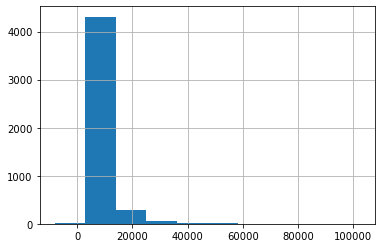

In [102]:
df1[((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR)))]['balance'].hist()
# even the balances graph seems to be usual.

-> some of the balances are negative. so outliers in balances can be ignored 

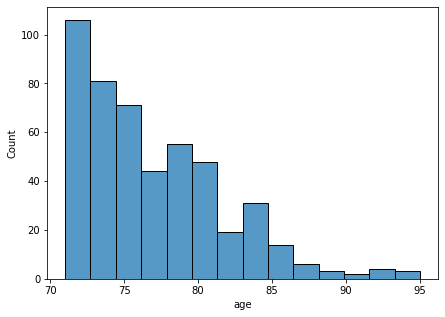

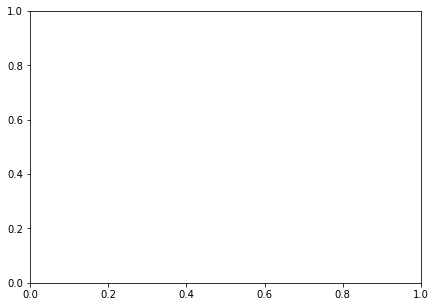

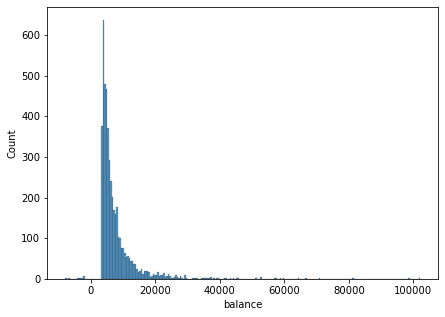

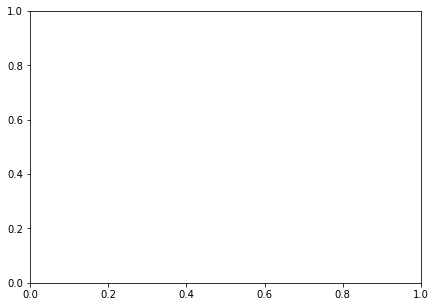

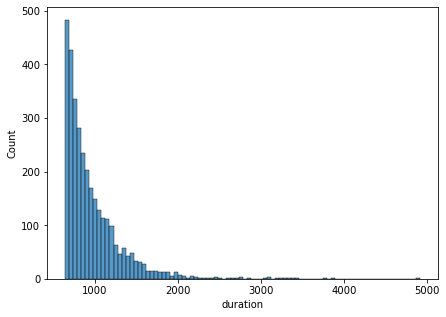

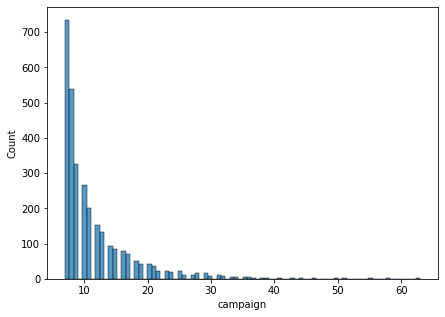

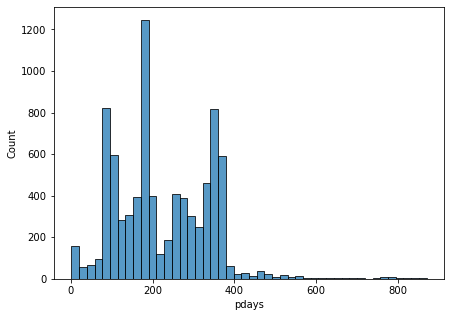

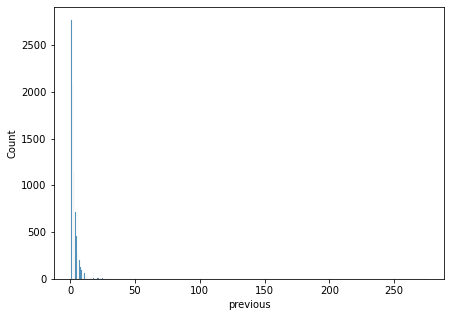

In [103]:
for i in num_cols:
    f, ax = plt.subplots(figsize=(7, 5))
    

    sns.histplot(outliers,
    x=i,
    
   
        
    )

In [ ]:
- Plotting outliers graphs to check for unusual graphs.

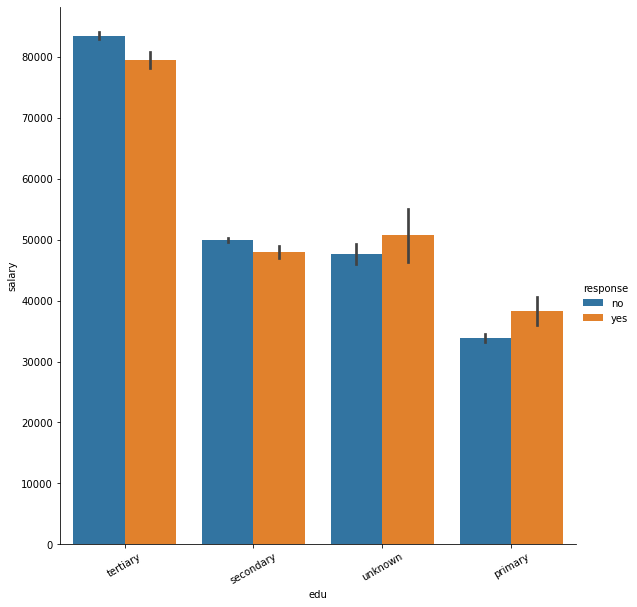

In [112]:
g=sns.catplot(x='edu',y='salary', hue='response', data=df1, kind='bar', height=8)
g.set_xticklabels(rotation=30)

In [ ]:
-> People with higher salary and primary education are more interested in TD's

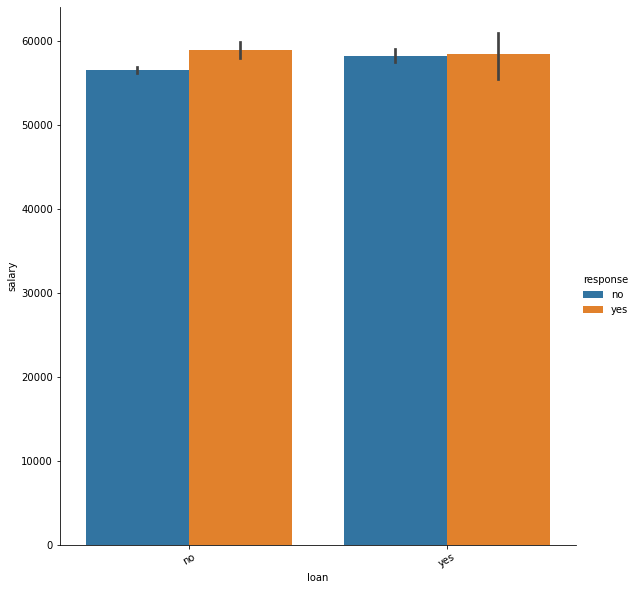

In [113]:
g=sns.catplot(x='loan',y='salary', hue='response', data=df1, kind='bar', height=8)
g.set_xticklabels(rotation=30)

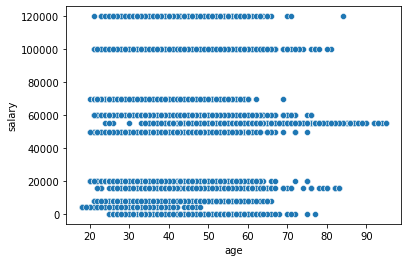

In [120]:
g=sns.scatterplot(data=df1, x="age", y="salary")


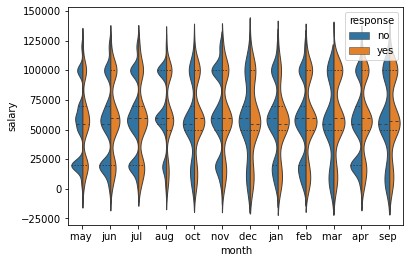

In [123]:
g=sns.violinplot(data=df1, x="month", y="salary", hue="response",
               split=True, inner="quart", linewidth=1)


In [ ]:
# in the mid of the year people showed more interest to term deposits. ( mar-sep)


In [130]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45049 entries, 1 to 45211
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       45049 non-null  float64
 1   salary    45049 non-null  float64
 2   balance   45049 non-null  int64  
 3   marital   45049 non-null  object 
 4   targeted  45049 non-null  object 
 5   default   45049 non-null  object 
 6   housing   45049 non-null  object 
 7   loan      45049 non-null  object 
 8   contact   45049 non-null  object 
 9   day       45049 non-null  int64  
 10  month     45049 non-null  object 
 11  duration  45049 non-null  float64
 12  campaign  45049 non-null  int64  
 13  pdays     45049 non-null  int64  
 14  previous  45049 non-null  int64  
 15  poutcome  45049 non-null  object 
 16  response  45049 non-null  object 
 17  job       45049 non-null  object 
 18  edu       45049 non-null  object 
dtypes: float64(3), int64(5), object(11)
memory usage: 8.1+ MB


In [133]:
pd.crosstab(df1.response, df.housing)
#people with no house showed more interest than people with house.

housing,no,yes
response,,
no,16649,23134
yes,3334,1932


In [136]:
pd.crosstab(df1.response, df.marital)
#the ratio is high is divorcees.

marital,divorced,married,single
response,,,
no,4572,24368,10843
yes,619,2743,1904


In [140]:
pd.pivot_table(df1, index =['response'], aggfunc={'age': [min,max,np.mean],'balance': [min,max,np.mean],'salary': [min,max,np.mean]})

age                    balance                         salary  \
           max       mean   min       max         mean     min       max   
response                                                                   
no        95.0  40.832893  18.0  102127.0  1303.032300 -8019.0  120000.0   
yes       95.0  41.642423  18.0   81204.0  1801.361755 -3058.0  120000.0   

                             
                  mean  min  
response                     
no        56841.841993  0.0  
yes       58915.495632  0.0

In [138]:
df1.groupby(['response']).mean()
#people with more balance seemed to be interested and more duration of calls.
#surprisingly capaigning more reduced the count.

,age,salary,balance,day,duration,campaign,pdays,previous
response,,,,,,,,
no,40.832893,56841.841993,1303.032300,15.896564,221.183123,2.844230,36.465450,0.502778
yes,41.642423,58915.495632,1801.361755,15.149449,537.695556,2.141474,68.625522,1.171288
